<a href="https://colab.research.google.com/github/Jamakasilwane/EDSA_Zindi_Hackathon/blob/master/EDSA_Zindi_Hackathon_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDSA-Zindi Hackathon Notebook**

# Introduction

Machine Learning and the use of regression models to make predictions have gained popularity in the logistic sector over the years. To improve the consistency and effeciency of deliveries, logistic companies have turned to using model training as a way to accuratley measure the Estimated Time of Arrival (ETA).

The following is a machine Learning problem which forms part of the Sendy Logistics Challenge hackathon hosted by Zindi. The aim of this project is to train a Machine Learning Model for an improved understanding in determining the Estimated Time of Arrival (ETA) for motorbike deliveries in Nairobi.

**Background of the Competition**

Zindi is the platform that hosts several or different Machine Learning Hackathons around the Africa Continent and with Sendy Logistics this Machine learning Hackathon is for the EDSA Explore Data-Science Academy Students that are currently enrolled for 2020 Academic Year. Sendy Logistics Company helps Clients/Customers to trade easily, deliver more competetive and build extraordinary businesses by transporting different kind of packages or deliveries from one point to another point efficiently. This Machine Learning problem is to solve the efficiency of Sendy's services and to better communication to the customers.














## Importing Libraries

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython.core.pylabtools import figsize

# Imputing missing values and scaling values
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

#Regression (Machine Learning Models)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge

# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#API
import pickle

## Importing the dataset

The following is the imported Data for Training the Machine Learning Model to predict the estimated time a delivery will take from one point to another point with full detail of each Dataset :

1. Train.csv { Dataset that contains all the variables that should be used to train the model to predict the estimated time. }
2. Test.csv  { Dataset that contains variables that will be used to test the model's accuracy in predicting the estimated time. }
3. SampleSubmission.csv {Sample of the Submission's expectation of the model trained for this Machine Learning problem. }
4. variableDefinitions.csv  {Dataset that contains all the definition of the whole data provided in details and gives more clarity of the data. }


In [0]:
train = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/Test.csv")
dataset_sample = pd.read_csv("https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/SampleSubmission.csv")
var = pd.read_csv('https://raw.githubusercontent.com/Jamakasilwane/EDSA_Zindi_Hackathon/master/Data/VariableDefinitions.csv')

# Data Preprocessing

## Data Cleaning and Formatting

The following section looks at information which pertains to both the training and testing datasets. It looks at the columns data types as check whether they correspond with what each column shows. We also check for missing values in the datasets. 

In [239]:
train.head(2)

,Order No,User Id,Vehicle Type,Platform Type,Personal or Business,Placement - Day of Month,Placement - Weekday (Mo = 1),Placement - Time,Confirmation - Day of Month,Confirmation - Weekday (Mo = 1),Confirmation - Time,Arrival at Pickup - Day of Month,Arrival at Pickup - Weekday (Mo = 1),Arrival at Pickup - Time,Pickup - Day of Month,Pickup - Weekday (Mo = 1),Pickup - Time,Arrival at Destination - Day of Month,Arrival at Destination - Weekday (Mo = 1),Arrival at Destination - Time,Distance (KM),Temperature,Precipitation in millimeters,Pickup Lat,Pickup Long,Destination Lat,Destination Long,Rider Id,Time from Pickup to Arrival
0,Order_No_4211,User_Id_633,Bike,3,Business,9,5,9:35:46 AM,9,5,9:40:10 AM,9,5,10:04:47 AM,9,5,10:27:30 AM,9,5,10:39:55 AM,4,20.4,NaN,-1.317755,36.830370,-1.300406,36.829741,Rider_Id_432,745
1,Order_No_25375,User_Id_2285,Bike,3,Personal,12,5,11:16:16 AM,12,5,11:23:21 AM,12,5,11:40:22 AM,12,5,11:44:09 AM,12,5,12:17:22 PM,16,26.4,NaN,-1.351453,36.899315,-1.295004,36.814358,Rider_Id_856,1993


In [240]:
#Checking the dataset_train information
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   21201 non-null  object 
 1   User Id                                    21201 non-null  object 
 2   Vehicle Type                               21201 non-null  object 
 3   Platform Type                              21201 non-null  int64  
 4   Personal or Business                       21201 non-null  object 
 5   Placement - Day of Month                   21201 non-null  int64  
 6   Placement - Weekday (Mo = 1)               21201 non-null  int64  
 7   Placement - Time                           21201 non-null  object 
 8   Confirmation - Day of Month                21201 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            21201 non-null  int64  
 10  Confirmation - Time   

In [241]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7068 entries, 0 to 7067
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Order No                              7068 non-null   object 
 1   User Id                               7068 non-null   object 
 2   Vehicle Type                          7068 non-null   object 
 3   Platform Type                         7068 non-null   int64  
 4   Personal or Business                  7068 non-null   object 
 5   Placement - Day of Month              7068 non-null   int64  
 6   Placement - Weekday (Mo = 1)          7068 non-null   int64  
 7   Placement - Time                      7068 non-null   object 
 8   Confirmation - Day of Month           7068 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)       7068 non-null   int64  
 10  Confirmation - Time                   7068 non-null   object 
 11  Arrival at Pickup

Looking at the datasets information, there are few data types which are incorrectly formatted. These includes:

*   Placement - Time
*   Confirmation - Time
*   Arrival at Pickup - Time
*   Pickup - Time
*   Arrival at Destination - Time
 

### Changing Time Columns Types Into Datetime Objects

The aforementioned columns above should be in a datetime format but they have been declared as object types. The function below converts all type columns into the correct type format (datetime).

In [0]:
#changing the data type of columns containing Time in the both train & test dataset
data = train.iloc[:,:-2].columns
for col in list(data):
    if 'Time' in col:
        train[col] = pd.to_datetime(train[col])
for col in list(test):
    if 'Time' in col:
        test[col] = pd.to_datetime(test[col])      

### Checking for missing values

In [243]:
#looking at the missing values in each column
train.isnull().sum()

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Since we now have the correct format of all the data types in the training data set, we then start to analyse the information variables containing numeric values. This includes checking for missing values and their percentage (%). From the data below, 'Temperature' and 'Precipitation in millimeters' columns have the the highest missing values in both datasets with 20.59% and 97.40% respectively.

In [244]:
#Checking the percetage of the missing values
round(train[['Temperature','Precipitation in millimeters']].isnull().sum()*100/
      len(train),2)

Temperature                     20.59
Precipitation in millimeters    97.40
dtype: float64

## Exploratory Data Analysis

Exploratory Data Analysis is the most important part in both Supervised and Unsupervised Machine Learning. Although it only gives us the overview of the provided data, we get to compare Variables/Columns of the Data provided and also get to plot different Graphs to visualize between certain Variables or visualize the Variable on it own.The following section gives an overview of some of the data provided and required for model training and testing.

As a way of preserving the uncleaned data, we start by making copies of the original dataframe.  Furthermore, a statistic description the dataframe was looked at to understand the data structure. The key takeways from the statistic descriotion is that the count of precipitaion and temperature differs from the rest of the dataset. Key insights of variables which have been illustrated using graphs have been provided each graph. 

In [0]:
#Making a copy for the dataframe
dataset_train = train.copy()
dataset_test = test.copy()

In [246]:
#checking the statistics description for the training dataset
round(dataset_train.describe().T,2)

,count,mean,std,min,25%,50%,75%,max
Platform Type,21201.0,2.75,0.63,1.00,3.00,3.00,3.00,4.00
Placement - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Placement - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Confirmation - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Confirmation - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Arrival at Pickup - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Arrival at Pickup - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Pickup - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00
Pickup - Weekday (Mo = 1),21201.0,3.24,1.57,1.00,2.00,3.00,5.00,7.00
Arrival at Destination - Day of Month,21201.0,15.65,8.80,1.00,8.00,15.00,23.00,31.00


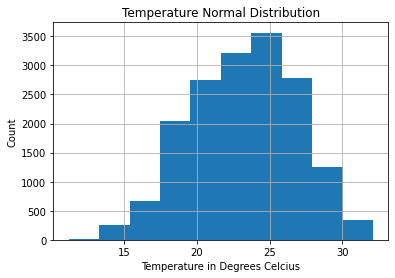

In [247]:
train['Temperature'].hist(bins = 10)
plt.title('Temperature Normal Distribution')
plt.xlabel('Temperature in Degrees Celcius')
plt.ylabel('Count')
plt.show()

The most common temperature at the time of order placement is 25 Degrees Celsius 

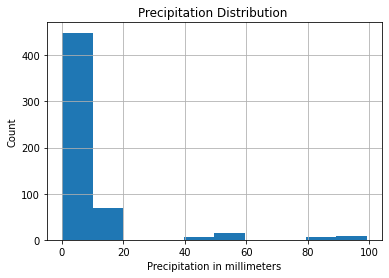

In [248]:
train['Precipitation in millimeters'].hist(bins = 10)
plt.xlabel('Precipitation in millimeters')
plt.ylabel('Count')
plt.title('Precipitation Distribution ')
plt.show()

The most common level of precipitation at the time of order placement was less than 20ml

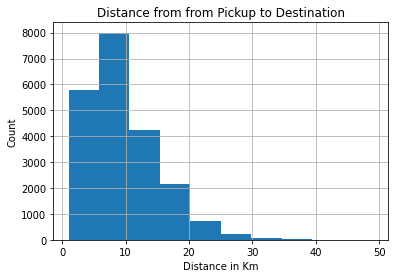

In [249]:
train['Distance (KM)'].hist(bins = 10)
plt.xlabel('Distance in Km')
plt.ylabel('Count')
plt.title('Distance from from Pickup to Destination')
plt.show()

The longest distance from  from pickup location to destination is 10Km 

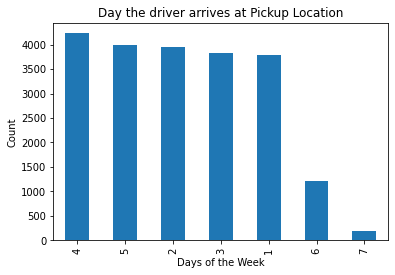

In [250]:
Arrival_Pickup = train['Arrival at Pickup - Weekday (Mo = 1)']
Arrival_Pickup.value_counts().plot(kind='bar')
plt.title('Day the driver arrives at Pickup Location')
plt.xlabel('Days of the Week')
plt.ylabel('Count')
plt.show()

From the Arrival at Pickup graph, it is evident that Most drivers arrive at the loaction of the pickup during weekdays compared to weekends. consequently, we further conclude that  weekends are not busy compared to weekdays

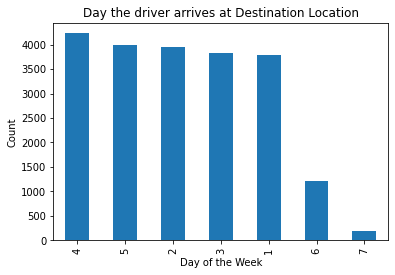

In [251]:
Arrival_Destination = train['Arrival at Destination - Weekday (Mo = 1)']
Arrival_Destination.value_counts().plot(kind='bar')
plt.title('Day the driver arrives at Destination Location')
plt.xlabel("Day of the Week")
plt.ylabel("Count")
plt.show()

The Arrival at Destination graph shows that drivers tend to reach the denstination location during weekdays with Thursday being the most frequent day of arrival at the destination. 

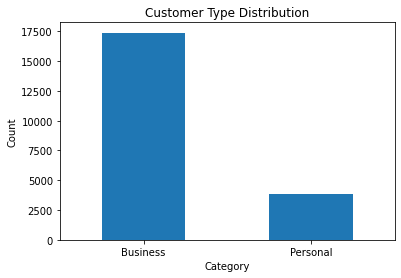

In [252]:
train['Personal or Business'].value_counts().plot(kind='bar',rot=0)
plt.title('Customer Type Distribution')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

Businesses are the most common customer type. This justifies why most drivers arrive at the destination location during weekdays since those are days at which most businesses operate.

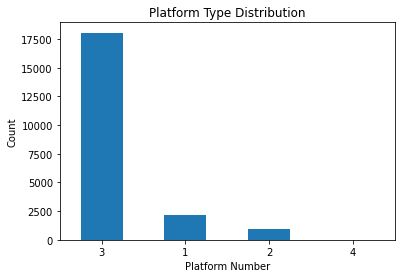

In [253]:
train['Platform Type'].value_counts().plot(kind='bar',rot=0)
plt.title("Platform Type Distribution")
plt.xlabel('Platform Number')
plt.ylabel('Count')
plt.show()

The most frequently used platform to place an oprder is type 3 platform.

## Correlation

In this section, we check for the correlation of each independant variable against the dependant variable. Mostly in the Machine Learning procedures we tend to choose the features which are strongly correlated to the dependant variable. These insights will assist in selecting variables that will help predicting the Dependant Variable.

In [254]:
#Looking for correlation between the target variable and other features
corr= train.corr()['Time from Pickup to Arrival'].sort_values()
print(corr.tail(20))

Destination Lat                             -0.061872
Pickup Lat                                  -0.053823
Placement - Day of Month                    -0.014710
Arrival at Destination - Day of Month       -0.014701
Confirmation - Day of Month                 -0.014701
Arrival at Pickup - Day of Month            -0.014701
Pickup - Day of Month                       -0.014701
Platform Type                               -0.003827
Temperature                                  0.006465
Placement - Weekday (Mo = 1)                 0.009693
Pickup - Weekday (Mo = 1)                    0.009744
Arrival at Destination - Weekday (Mo = 1)    0.009744
Confirmation - Weekday (Mo = 1)              0.009744
Arrival at Pickup - Weekday (Mo = 1)         0.009744
Precipitation in millimeters                 0.024756
Pickup Long                                  0.060285
Destination Long                             0.070425
Distance (KM)                                0.580608
Time from Pickup to Arrival 


Although precipitation in millimeters had over 90% missing values, it is still usefull in  predicting the target variable. This is evident in the correletion above which shows that there is a positive correlation between precipitation in millimeters and the target variable (Time from Pickup to Arrival).

## Encoding Categoric Data 

#### Datetime Formatting

As the Date-time Columns have been correctly formatted to the Datetime format, this section extracts time in  hours, minutes and seconds from the datetime columns. The extracted columns were then added into the dataframes.

In [0]:
#Hours were extracted and added to the dataframe as new columns
#Train
dataset_train['Placement - Hour'] = dataset_train['Placement - Time'].dt.hour

dataset_train['Confirmation - Hour'] = dataset_train['Confirmation - Time'].dt.hour

dataset_train['Arrival at Pickup - Hour'] = dataset_train['Arrival at Pickup - Time'].dt.hour

dataset_train['Pickup - Hour'] = dataset_train['Pickup - Time'].dt.hour

#Test
dataset_test['Placement - Hour'] = dataset_test['Placement - Time'].dt.hour

dataset_test['Confirmation - Hour'] = dataset_test['Confirmation - Time'].dt.hour

dataset_test['Arrival at Pickup - Hour'] = dataset_test['Arrival at Pickup - Time'].dt.hour

dataset_test['Pickup - Hour'] = dataset_test['Pickup - Time'].dt.hour



In [0]:
#Minutes were extracted and added to the dataframe as new columns
#TRAIN
dataset_train['Placement - Minutes'] = dataset_train['Placement - Time'].dt.minute

dataset_train['Confirmation - Minutes'] = dataset_train['Confirmation - Time'].dt.minute

dataset_train['Arrival at Pickup - Minutes'] = dataset_train['Arrival at Pickup - Time'].dt.minute

dataset_train['Pickup - Minutes'] = dataset_train['Pickup - Time'].dt.minute

#TEST
dataset_test['Placement - Minutes'] = dataset_test['Placement - Time'].dt.minute

dataset_test['Confirmation - Minutes'] = dataset_test['Confirmation - Time'].dt.minute

dataset_test['Arrival at Pickup - Minutes'] = dataset_test['Arrival at Pickup - Time'].dt.minute

dataset_test['Pickup - Minutes'] = dataset_test['Pickup - Time'].dt.minute

In [0]:
#Seconds were extracted and added to the dataframe as new columns
#TRAIN
dataset_train['Placement - Seconds'] = dataset_train['Placement - Time'].dt.second

dataset_train['Confirmation - Seconds'] = dataset_train['Confirmation - Time'].dt.second

dataset_train['Arrival at Pickup - Seconds'] = dataset_train['Arrival at Pickup - Time'].dt.second

dataset_train['Pickup - Seconds'] = dataset_train['Pickup - Time'].dt.second

# TEST
dataset_test['Placement - Seconds'] = dataset_test['Placement - Time'].dt.second

dataset_test['Confirmation - Seconds'] = dataset_test['Confirmation - Time'].dt.second

dataset_test['Arrival at Pickup - Seconds'] = dataset_test['Arrival at Pickup - Time'].dt.second

dataset_test['Pickup - Seconds'] = dataset_test['Pickup - Time'].dt.second

#### Platform Type

For the Platform Type column, we changed the variables it to the dummy variables to have a cleared and measurable feature for the model. We then encode the dummy variables as new columns.

In [0]:
#Dummy coding of the 'Platform Type' column:
#TRAIN
dataset_train['Platform Type'] = dataset_train['Platform Type'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns = ['Platform Type']), 
                           pd.get_dummies(dataset_train['Platform Type'])], 
                          axis = 1)

#TEST 
dataset_test['Platform Type'] = dataset_test['Platform Type'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns = ['Platform Type']),
                          pd.get_dummies(dataset_test['Platform Type'])], 
                         axis = 1)

In [0]:
#Renaming the 'platform type' columns
dataset_train.rename(columns = {1: "Platform Type 1", 2: "Platform Type 2", 3:
                              "Platform Type 3", 4: "Platform Type 4"},
                     inplace = True)
dataset_test.rename(columns = {1: "Platform Type 1", 2: "Platform Type 2", 3:
                             "Platform Type 3", 4: "Platform Type 4"},
                    inplace=True)

#### Personal or Business

In [0]:
#Dummy coding of the 'Personal or Business' column
#TRAIN
dataset_train['Personal or Business'] = dataset_train['Personal or Business'].astype('category')
dataset_train = pd.concat([dataset_train.drop(columns = ['Personal or Business']), 
                          pd.get_dummies(dataset_train['Personal or Business'])], 
                          axis=1)

#TEST
dataset_test['Personal or Business'] = dataset_test['Personal or Business'].astype('category')
dataset_test = pd.concat([dataset_test.drop(columns = ['Personal or Business']), 
                          pd.get_dummies(dataset_test['Personal or Business'])],
                          axis = 1)

In [0]:
#Renaming the 'Personal or Business' columns
dataset_train.rename(columns={0: "Business", 1: "Personal"}, inplace=True)
dataset_test.rename(columns={0: "Business", 1: "Personal"}, inplace=True)

## Selecting columns to be used for model training and testing 

In this section, a list of columns that will be used for model training and testing. The dataframes are also converted into a numpy array

In [0]:
X1 = dataset_train.loc[:,['Order No','Distance (KM)', 'Temperature',
                          'Precipitation in millimeters', 'Platform Type 1', 
                          'Platform Type 2', 'Platform Type 3', 
                          'Platform Type 4', 'Business', 'Personal',
                          'Placement - Hour', 'Confirmation - Hour', 
                          'Arrival at Pickup - Hour', 'Pickup - Hour', 
                          'Placement - Minutes', 'Confirmation - Minutes',
                          'Arrival at Pickup - Minutes', 'Pickup - Minutes',
                          'Placement - Seconds', 'Confirmation - Seconds',
                          'Arrival at Pickup - Seconds', 'Pickup - Seconds']]

Y_train = dataset_train.loc[:,['Time from Pickup to Arrival']].values

X2 = dataset_test.loc[:,['Order No','Distance (KM)', 'Temperature',
                          'Precipitation in millimeters', 'Platform Type 1', 
                          'Platform Type 2', 'Platform Type 3', 
                          'Platform Type 4', 'Business', 'Personal',
                          'Placement - Hour', 'Confirmation - Hour', 
                          'Arrival at Pickup - Hour', 'Pickup - Hour', 
                          'Placement - Minutes', 'Confirmation - Minutes',
                          'Arrival at Pickup - Minutes', 'Pickup - Minutes',
                          'Placement - Seconds', 'Confirmation - Seconds',
                          'Arrival at Pickup - Seconds', 'Pickup - Seconds']]

Y_test = dataset_sample.iloc[:,-1].values

In [0]:
#changing the Index for both X_train & X_test Dataframes to be Order No and convert the Dataframes to Numpy arrays
X_train = X1.set_index('Order No').values
X_test = X2.set_index('Order No').values

## Taking care of missing values in the data sets

From the data exploration done in the previous section, it has been seen that some columns had missing values. The following section imputes the missing values with the mean.


In [0]:
#The missing values of temperature and Precipitation in millimeters have been replaced with the mean
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit(X_train[:,1:3],X_test[:,1:3])
X_train[:,1:3] = imputer.transform(X_train[:,1:3])
X_test[:,1:3] = imputer.transform(X_test[:,1:3])

## Feature Scaling of the training and test data set

Now that the data cleaning is done, the data is now transformed to have a mean value if zero and a standard deviation of 1.

In [0]:
# create scaled version of the predictors
sc = StandardScaler()
X_train[:,:] = sc.fit_transform(X_train[:,:])
X_test[:,:] = sc.transform(X_test[:,:])

In [0]:
df_Y1 = pd.DataFrame(Y_train)
df_Y2 = pd.DataFrame(Y_test)
Y_train = df_Y1.fillna(df_Y1.mean())
Y_test =df_Y2.fillna(df_Y2.mean())

In [0]:
Y_train = Y_train.values
Y_test = Y_test.values

# Regression

## Linear Regression

In [268]:
lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
beta_0 = float(lr.intercept_)

In [270]:
print(beta_0)

1556.775410064313


In [0]:
#predicting y using the X_test
y_pred_linear = lr.predict(X_test)

In [308]:
#comparing the y_pred with the actual Y values
np.set_printoptions(precision = 2)
print(np.concatenate((y_pred_linear.reshape(len(y_pred_linear),1), 
                      Y_test.reshape(len(Y_test),1)),1))

[[1372.77  567.  ]
 [1217.24 4903.  ]
 [ 956.94 5649.  ]
 ...
 [1669.69 3706.33]
 [2596.27 3706.33]
 [1504.47 3706.33]]


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred_linear)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted = X2[['Order No','Time from Pickup to Arrival']]

In [0]:
Y_test1 = pd.DataFrame(Y_test)

In [275]:
print("RMSE: ", np.sqrt(mean_squared_error(Y_test1,y_pred_linear)))

RMSE:  2233.441993468851


In [276]:
predicted

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1372.77
1,Order_No_12736,1217.24
2,Order_No_768,956.94
3,Order_No_15332,1027.13
4,Order_No_21373,1226.52
...,...,...
7063,Order_No_3612,1018.02
7064,Order_No_7657,2976.98
7065,Order_No_1969,1669.69
7066,Order_No_10591,2596.27


In [0]:
#save linear model results as a .csv file
predicted.to_csv('predicted_time_LR.csv',index=False)

## Decision Tree

In [0]:
regr_tree = DecisionTreeRegressor(max_depth=3)

In [279]:
regr_tree.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [0]:
y_pred_dt = regr_tree.predict(X_test)

In [281]:
print('RMSE:', np.sqrt(mean_squared_error(Y_test1,y_pred_dt)))

RMSE: 2224.2483276045705


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred_dt)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted_dt = X2[['Order No','Time from Pickup to Arrival']]

In [283]:
predicted_dt

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1577.91
1,Order_No_12736,1136.40
2,Order_No_768,1136.40
3,Order_No_15332,1136.40
4,Order_No_21373,1328.94
...,...,...
7063,Order_No_3612,1136.40
7064,Order_No_7657,2532.24
7065,Order_No_1969,1577.91
7066,Order_No_10591,2532.24


In [0]:
#save Decision Tree results as a .csv file
predicted_dt.to_csv('predicted_time_Decision_Tree.csv',index=False)

##Lasso regression

In [285]:
# Importing the model class
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2269650329.404784, tolerance: 2066371.650150738
  positive)


Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [286]:
beta_2 = float(lasso.intercept_)
print(beta_2)

1556.9209471251343


In [0]:
y_pred_lasso = lasso.predict(X_test)

In [288]:
#Calculate the Root-Mean squared error
print('RMSE:', np.sqrt(metrics.mean_squared_error(Y_test1, y_pred_lasso)))


RMSE: 2233.567677171059


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred_lasso)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted_lasso = X2[['Order No','Time from Pickup to Arrival']]

In [290]:
predicted_lasso

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1371.51
1,Order_No_12736,1207.41
2,Order_No_768,960.38
3,Order_No_15332,1024.91
4,Order_No_21373,1221.43
...,...,...
7063,Order_No_3612,1016.20
7064,Order_No_7657,2969.94
7065,Order_No_1969,1663.33
7066,Order_No_10591,2599.90


In [0]:
#save the lasso results as a .csv file
predicted_lasso.to_csv('predicted_time_lasso.csv',index=False)

## Support Vector Regressor

In [0]:
# Instantiate support vector regression model
svr = SVR(kernel='rbf', gamma ='auto')

In [293]:
svr.fit(X_train,Y_train[:,0])

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred_svr = svr.predict(X_test)

In [295]:
print("RMSE: ", np.sqrt(mean_squared_error(Y_test,y_pred_svr)))

RMSE:  2344.831835366399


In [0]:
#create a dataframe containing the expected outputs for Submission
x = pd.DataFrame(y_pred_svr)
x = round(x,2)
X2['Time from Pickup to Arrival'] = x
predicted_svr = X2[['Order No','Time from Pickup to Arrival']]

In [297]:
predicted_svr

,Order No,Time from Pickup to Arrival
0,Order_No_19248,1327.59
1,Order_No_12736,1134.82
2,Order_No_768,1182.48
3,Order_No_15332,1177.89
4,Order_No_21373,1200.02
...,...,...
7063,Order_No_3612,1158.63
7064,Order_No_7657,1715.51
7065,Order_No_1969,1396.27
7066,Order_No_10591,1644.58


In [0]:
#save the results as the .csv file
predicted_svr.to_csv('predicted_time_svr.csv',index=False)

# Model Evaluation and Concluding Remarks

Now that the regression has been performed, what follows is checking how good the model fits to unseen data. The predict instructions outlined that the Root Mean Square Error should be used as our metric to check for model performance. 

In [0]:
# dictionary of results
RMSE_dict = {'RMSE':
             {
                 "Linear Regression": np.sqrt(mean_squared_error
                                           (Y_test1,y_pred_linear)),
              "Decision Tree": np.sqrt(mean_squared_error(Y_test1,y_pred_dt)),
              "Lasso regression": np.sqrt(metrics.mean_squared_error
                                          (Y_test1, y_pred_lasso)),
              "Support Vector Regressor": np.sqrt(mean_squared_error
                                                  (Y_test,y_pred_svr))
              }
             }

In [0]:
# create dataframe from dictionary
RMSE_df = pd.DataFrame(data=RMSE_dict)

In [301]:
round(RMSE_df,2)

,RMSE
Decision Tree,2224.25
Lasso regression,2233.57
Linear Regression,2233.44
Support Vector Regressor,2344.83


From the RMSE scores of the regression models shown above, it is evident that the Decision Tree model performs better as it has the least RMSE. However, when testing the data on Zindi, Lasso regression performed better with an RMSE score of 766.9862. It is evident that some models may yield the least RMSE, but that does not guarantee that they are the best models for predictiong unseen data. As a result, Lasso Regression model has been chosen as the best model in making predicting the Estimated Time of Arrival.

##Saving Submission File

In [0]:
#save the results of the chosen model as a .csv file
predicted_lasso.to_csv("predicted_time_lasso.csv",index=False)

In [0]:
# Saving the trained model as .pkl file
model_save_path = "trained_model.pkl"
with open(model_save_path,'wb') as file:
    pickle.dump(lasso,file)